In [135]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

In [136]:
from sklearn.datasets import load_boston
boston = load_boston()


In [137]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [138]:
bt = pd.DataFrame(boston.data, columns = boston.feature_names)
bt.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [139]:
bt['MEDV'] = boston.target

In [140]:
bt.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Analisis Exploratorio, buscar outliers
valores atípicos o anómalos

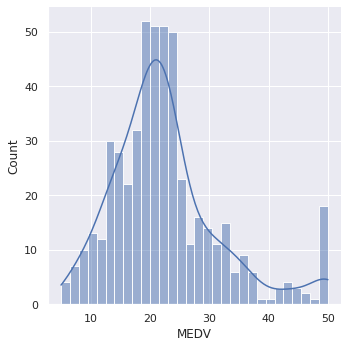

In [141]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(bt['MEDV'], bins=30, kde=True)
plt.show()

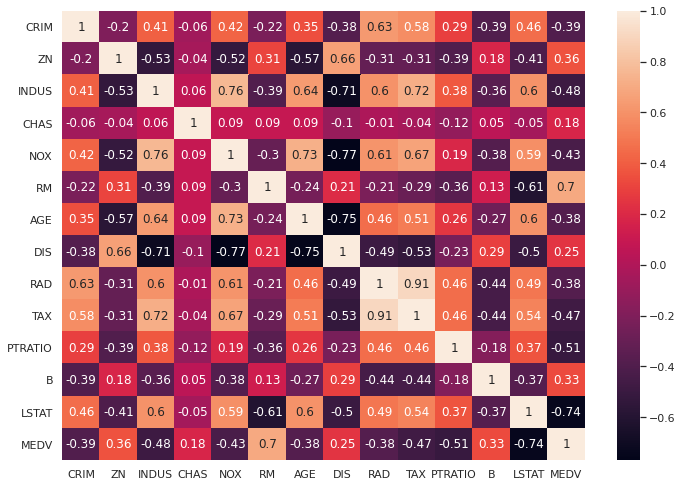

In [142]:
matriz = bt.corr().round(2)
sns.heatmap(data = matriz, annot=True)

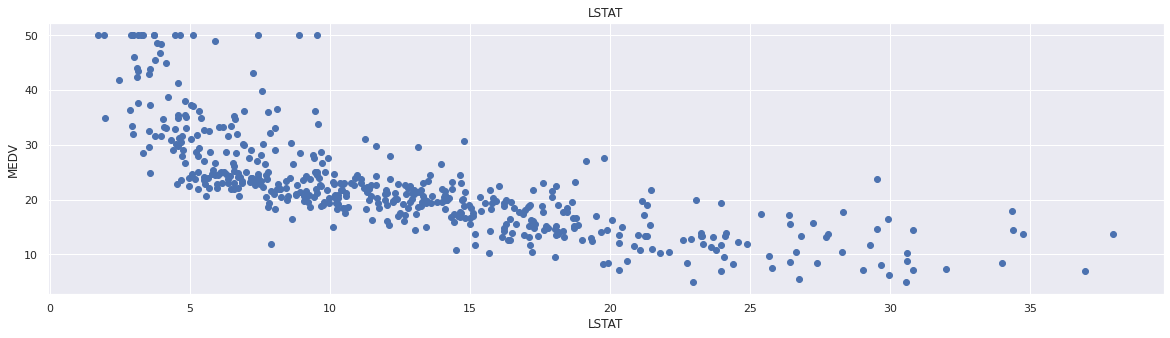

In [143]:
plt.figure(figsize=(20,5))

#bases = ['LSTAT','RM']
bases = ['LSTAT']
objetivo = bt['MEDV']

for i, col in enumerate(bases):
  plt.subplot(1, len(bases), i+1)
  x = bt[col]
  y = objetivo
  plt.scatter(x,y,marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')

In [164]:
#Preprocesar los datos
X = pd.DataFrame(np.c_[bt['LSTAT'],bt['RM'],bt['CRIM'],bt['ZN'],bt['INDUS'],bt['CHAS'],bt['NOX'],bt['AGE'],bt['DIS'],bt['RAD'],bt['TAX'],bt['PTRATIO'],bt['B']], columns=['LSTAT','RM','CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B'])
#X = pd.DataFrame(np.c_[bt['LSTAT'],bt['RM']], columns=['LSTAT','RM'])
#X = pd.DataFrame(np.c_[bt['LSTAT']], columns=['LSTAT'])
Y = bt['MEDV']

In [145]:
#Separar los conjuntos en datos de entrenamiento y datos de testeo
from sklearn.model_selection import train_test_split

X_entrenamiento, X_testeo, Y_entrenamiento, Y_testeo = train_test_split(X,Y, test_size = 0.2, random_state = 5)

print(X_entrenamiento.shape)
print(X_testeo.shape)
print(Y_entrenamiento.shape)
print(Y_testeo.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [146]:
# Creacion de Modelo (Regresion Lineal) y ejecutar el entrenamiento
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo = LinearRegression()
modelo.fit(X_entrenamiento,Y_entrenamiento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
# Evaluación del modelo

prediccion_Y_entrenamiento = modelo.predict(X_entrenamiento)
rmse = (np.sqrt(mean_squared_error(Y_entrenamiento,prediccion_Y_entrenamiento)))
r2 = r2_score(Y_entrenamiento,prediccion_Y_entrenamiento)

print("Rendimiento del conjunto de entrenamiento")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

Rendimiento del conjunto de entrenamiento
RMSE es 6.201452973865344
R2 score es 0.5523019908037391


In [148]:
# Evaluación del modelo para conjunto de testeo

prediccion_Y_testeo = modelo.predict(X_testeo)
rmse = (np.sqrt(mean_squared_error(Y_testeo,prediccion_Y_testeo)))
r2 = r2_score(Y_testeo,prediccion_Y_testeo)

print("Rendimiento del conjunto de testeo")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

Rendimiento del conjunto de testeo
RMSE es 6.2307165730986815
R2 score es 0.5041523728903132


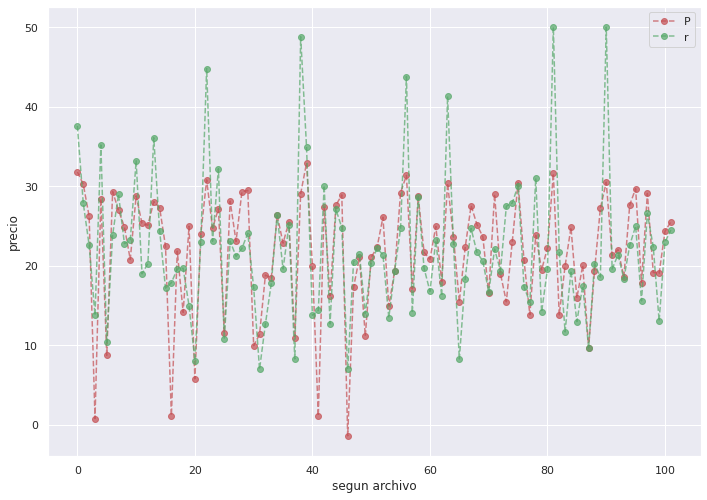

In [149]:
#Graficar 
eje_x = np.array(range(0,prediccion_Y_testeo.shape[0]))
plt.plot(eje_x, prediccion_Y_testeo, linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(eje_x, Y_testeo, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_testeo")
plt.xlabel('segun archivo')
plt.ylabel('precio')
plt.legend('Predicciones vs Y_testeo')
#plt.savefig('Predicciones_vs_Y_testeo.png')
#plt.clf()
#plt.close()
plt.show()

Text(0, 0.5, 'MEDV')

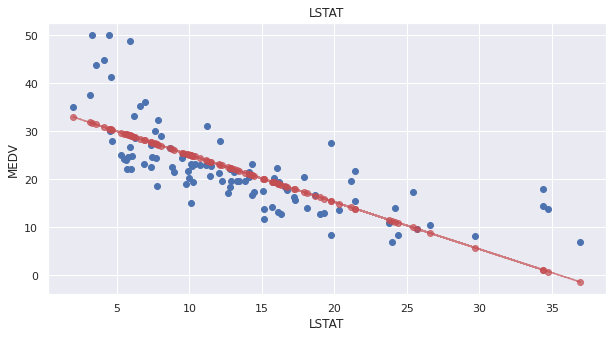

In [150]:
plt.figure(figsize=(10,5))

#bases = ['LSTAT','RM']
objetivo = bt['MEDV']

#for i, col in enumerate(bases):
#plt.subplot(1, len('LSTAT'), i+1)
x = X_testeo
y = Y_testeo
plt.plot(x, modelo.predict(X_testeo), linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.scatter(x,y,marker='o')
plt.title(col)
plt.xlabel(col)
plt.ylabel('MEDV')

-----------------------------------------
Rendimiento del conjunto de entrenamiento
RMSE es 6.2030842454897215
R2 score es 0.5520664288747816
-----------------------------------------
Rendimiento del conjunto de testeo
RMSE es 6.207978681467828
R2 score es 0.5077647848123193


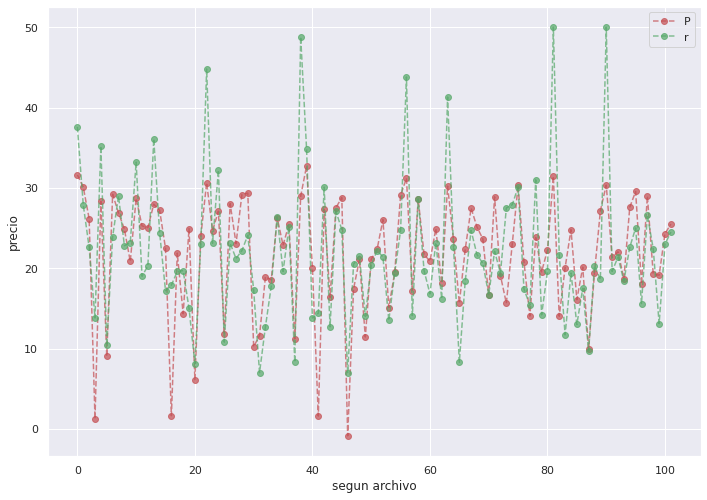

Text(0, 0.5, 'MEDV')

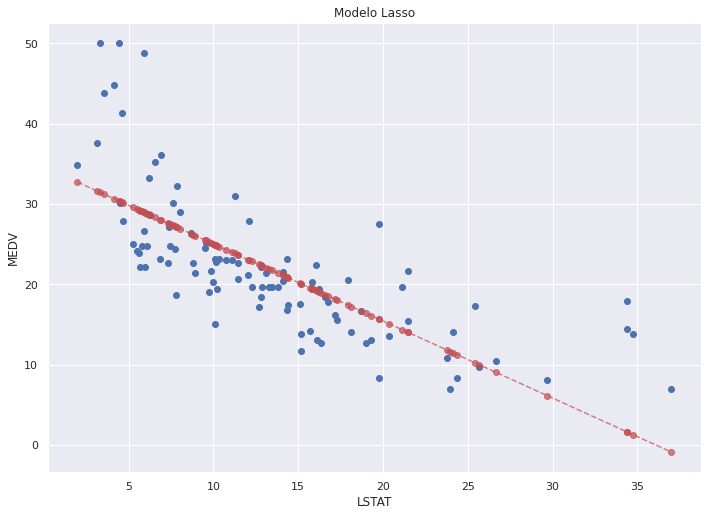

In [87]:
# Creacion de Modelo (Lasso) y ejecutar el entrenamiento
from sklearn.linear_model import Lasso

modelo = Lasso()
modelo.fit(X_entrenamiento,Y_entrenamiento)

# Evaluación del modelo (Lasso)
prediccion_Y_entrenamiento = modelo.predict(X_entrenamiento)
rmse = (np.sqrt(mean_squared_error(Y_entrenamiento,prediccion_Y_entrenamiento)))
r2 = r2_score(Y_entrenamiento,prediccion_Y_entrenamiento)

print("-----------------------------------------")
print("Rendimiento del conjunto de entrenamiento")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

# Evaluación del modelo para conjunto de testeo (Lasso)
prediccion_Y_testeo = modelo.predict(X_testeo)
rmse = (np.sqrt(mean_squared_error(Y_testeo,prediccion_Y_testeo)))
r2 = r2_score(Y_testeo,prediccion_Y_testeo)

print("-----------------------------------------")
print("Rendimiento del conjunto de testeo")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

#Graficar segun arreglo
eje_x = np.array(range(0,prediccion_Y_testeo.shape[0]))
plt.plot(eje_x, prediccion_Y_testeo, linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(eje_x, Y_testeo, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_testeo")
plt.xlabel('segun archivo')
plt.ylabel('precio')
plt.legend('Predicciones vs Y_testeo')
plt.show()

#Graficar Modelo
modelo_desordenado = pd.DataFrame(np.c_[X_testeo,modelo.predict(X_testeo)], columns=['LSTAT','MEDV_'])
modelo_ordenado = modelo_desordenado.sort_values(by='LSTAT', ascending=True)
x = X_testeo
y = Y_testeo
#plt.plot(x, modelo.predict(X_testeo), linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(modelo_ordenado['LSTAT'], modelo_ordenado['MEDV_'], linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.scatter(x,y,marker='o')
plt.title('Modelo Lasso')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

-----------------------------------------
Rendimiento del conjunto de entrenamiento
RMSE es 6.203019625525421
R2 score es 0.5520757614259646
-----------------------------------------
Rendimiento del conjunto de testeo
RMSE es 6.208397681660196
R2 score es 0.5076983369004873


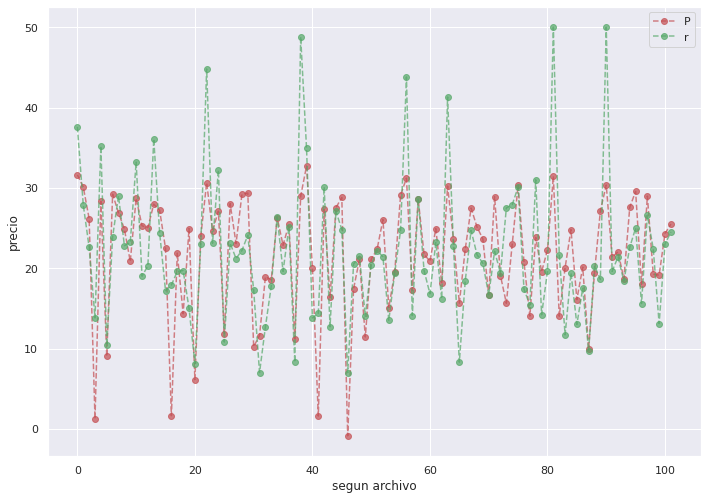

Text(0, 0.5, 'MEDV')

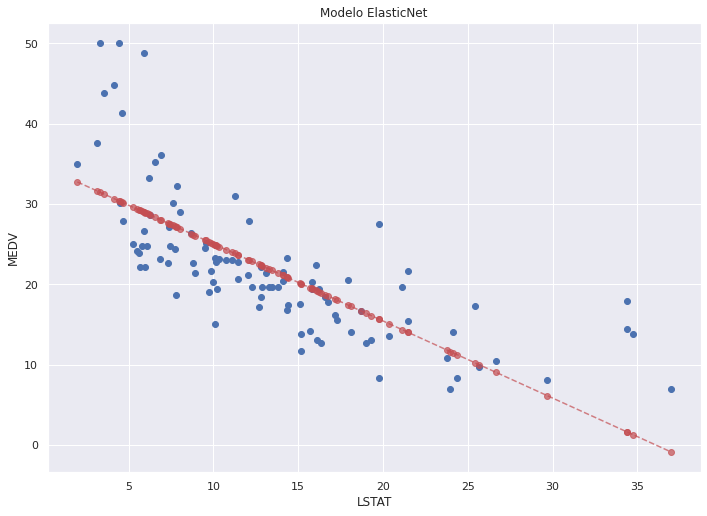

In [151]:
# Creacion de Modelo (ElasticNet) y ejecutar el entrenamiento
from sklearn.linear_model import ElasticNet

modelo = ElasticNet()
modelo.fit(X_entrenamiento,Y_entrenamiento)

# Evaluación del modelo (ElasticNet)
prediccion_Y_entrenamiento = modelo.predict(X_entrenamiento)
rmse = (np.sqrt(mean_squared_error(Y_entrenamiento,prediccion_Y_entrenamiento)))
r2 = r2_score(Y_entrenamiento,prediccion_Y_entrenamiento)

print("-----------------------------------------")
print("Rendimiento del conjunto de entrenamiento")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

# Evaluación del modelo para conjunto de testeo (ElasticNet)
prediccion_Y_testeo = modelo.predict(X_testeo)
rmse = (np.sqrt(mean_squared_error(Y_testeo,prediccion_Y_testeo)))
r2 = r2_score(Y_testeo,prediccion_Y_testeo)

print("-----------------------------------------")
print("Rendimiento del conjunto de testeo")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

#Graficar segun arreglo
eje_x = np.array(range(0,prediccion_Y_testeo.shape[0]))
plt.plot(eje_x, prediccion_Y_testeo, linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(eje_x, Y_testeo, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_testeo")
plt.xlabel('segun archivo')
plt.ylabel('precio')
plt.legend('Predicciones vs Y_testeo')
plt.show()

#Graficar Modelo
modelo_desordenado = pd.DataFrame(np.c_[X_testeo,modelo.predict(X_testeo)], columns=['LSTAT','MEDV_'])
modelo_ordenado = modelo_desordenado.sort_values(by='LSTAT', ascending=True)
x = X_testeo
y = Y_testeo
#plt.plot(x, modelo.predict(X_testeo), linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(modelo_ordenado['LSTAT'], modelo_ordenado['MEDV_'], linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.scatter(x,y,marker='o')
plt.title('Modelo ElasticNet')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

-----------------------------------------
Rendimiento del conjunto de entrenamiento
RMSE es 1.497875282871142
R2 score es 0.9738814199649357
-----------------------------------------
Rendimiento del conjunto de testeo
RMSE es 8.349677110112538
R2 score es 0.10954575374982478


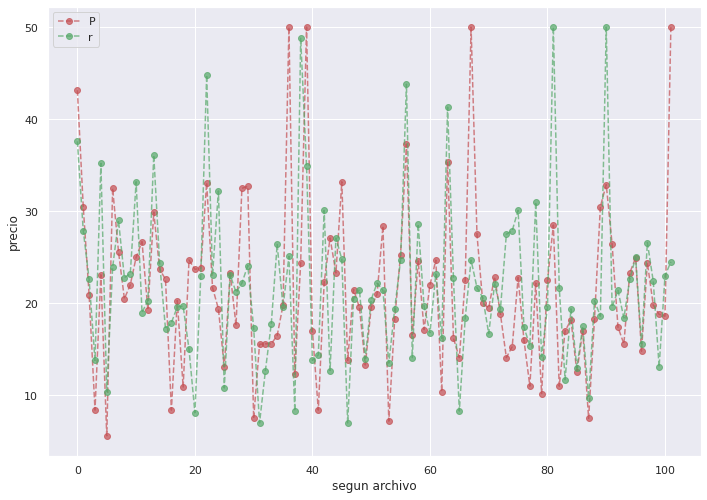

Text(0, 0.5, 'MEDV')

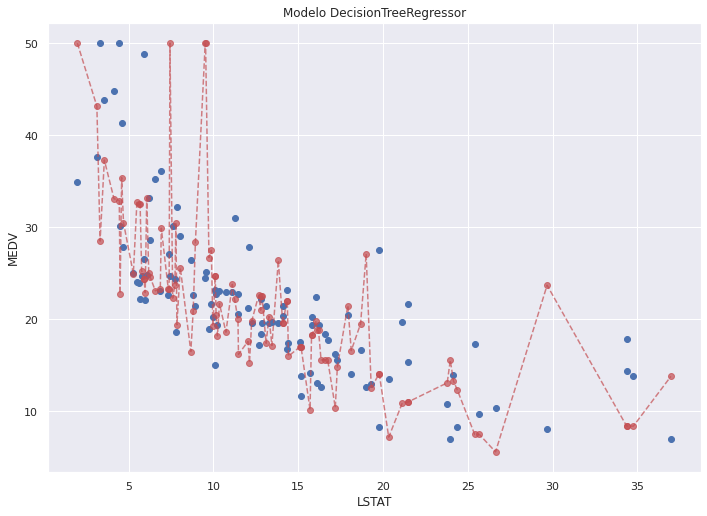

In [152]:
# Creacion de Modelo (DecisionTreeRegressor) y ejecutar el entrenamiento
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(X_entrenamiento,Y_entrenamiento)

# Evaluación del modelo (DecisionTreeRegressor)
prediccion_Y_entrenamiento = modelo.predict(X_entrenamiento)
rmse = (np.sqrt(mean_squared_error(Y_entrenamiento,prediccion_Y_entrenamiento)))
r2 = r2_score(Y_entrenamiento,prediccion_Y_entrenamiento)

print("-----------------------------------------")
print("Rendimiento del conjunto de entrenamiento")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

# Evaluación del modelo para conjunto de testeo (DecisionTreeRegressor)
prediccion_Y_testeo = modelo.predict(X_testeo)
rmse = (np.sqrt(mean_squared_error(Y_testeo,prediccion_Y_testeo)))
r2 = r2_score(Y_testeo,prediccion_Y_testeo)

print("-----------------------------------------")
print("Rendimiento del conjunto de testeo")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

#Graficar segun arreglo
eje_x = np.array(range(0,prediccion_Y_testeo.shape[0]))
plt.plot(eje_x, prediccion_Y_testeo, linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(eje_x, Y_testeo, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_testeo")
plt.xlabel('segun archivo')
plt.ylabel('precio')
plt.legend('Predicciones vs Y_testeo')
plt.show()

#Graficar Modelo
modelo_desordenado = pd.DataFrame(np.c_[X_testeo,modelo.predict(X_testeo)], columns=['LSTAT','MEDV_'])
modelo_ordenado = modelo_desordenado.sort_values(by='LSTAT', ascending=True)
x = X_testeo
y = Y_testeo
#plt.plot(x, modelo.predict(X_testeo), linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(modelo_ordenado['LSTAT'], modelo_ordenado['MEDV_'], linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.scatter(x,y,marker='o')
plt.title('Modelo DecisionTreeRegressor')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

-----------------------------------------
Rendimiento del conjunto de entrenamiento
RMSE es 4.626143744047958
R2 score es 0.7508639928326483
-----------------------------------------
Rendimiento del conjunto de testeo
RMSE es 5.62471994945561
R2 score es 0.5959137665137708


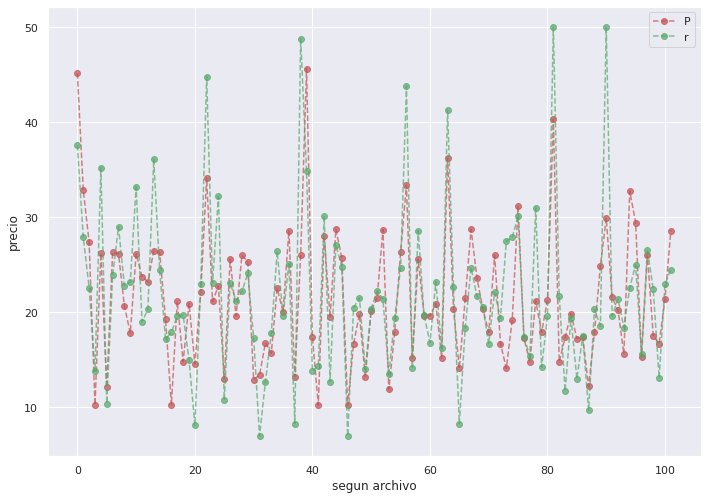

Text(0, 0.5, 'MEDV')

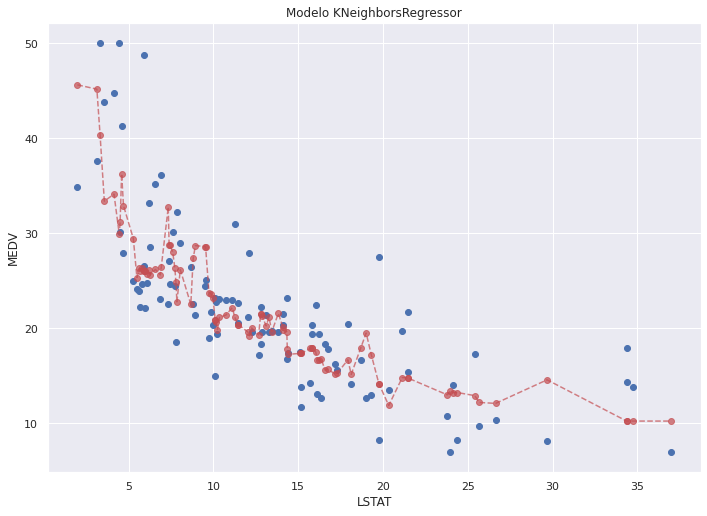

In [153]:
# Creacion de Modelo (KNeighborsRegressor) y ejecutar el entrenamiento
from sklearn.neighbors import KNeighborsRegressor

modelo = KNeighborsRegressor()
modelo.fit(X_entrenamiento,Y_entrenamiento)

# Evaluación del modelo (DecisionTreeRegressor)
prediccion_Y_entrenamiento = modelo.predict(X_entrenamiento)
rmse = (np.sqrt(mean_squared_error(Y_entrenamiento,prediccion_Y_entrenamiento)))
r2 = r2_score(Y_entrenamiento,prediccion_Y_entrenamiento)

print("-----------------------------------------")
print("Rendimiento del conjunto de entrenamiento")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

# Evaluación del modelo para conjunto de testeo (KNeighborsRegressor)
prediccion_Y_testeo = modelo.predict(X_testeo)
rmse = (np.sqrt(mean_squared_error(Y_testeo,prediccion_Y_testeo)))
r2 = r2_score(Y_testeo,prediccion_Y_testeo)

print("-----------------------------------------")
print("Rendimiento del conjunto de testeo")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

#Graficar segun arreglo
eje_x = np.array(range(0,prediccion_Y_testeo.shape[0]))
plt.plot(eje_x, prediccion_Y_testeo, linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(eje_x, Y_testeo, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_testeo")
plt.xlabel('segun archivo')
plt.ylabel('precio')
plt.legend('Predicciones vs Y_testeo')
plt.show()

#Graficar Modelo
modelo_desordenado = pd.DataFrame(np.c_[X_testeo,modelo.predict(X_testeo)], columns=['LSTAT','MEDV_'])
modelo_ordenado = modelo_desordenado.sort_values(by='LSTAT', ascending=True)
x = X_testeo
y = Y_testeo
#plt.plot(x, modelo.predict(X_testeo), linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(modelo_ordenado['LSTAT'], modelo_ordenado['MEDV_'], linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.scatter(x,y,marker='o')
plt.title('Modelo KNeighborsRegressor')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

-----------------------------------------
Rendimiento del conjunto de entrenamiento
RMSE es 5.836962383204569
R2 score es 0.6033823448412788
-----------------------------------------
Rendimiento del conjunto de testeo
RMSE es 5.651689906704968
R2 score es 0.5920293717740585


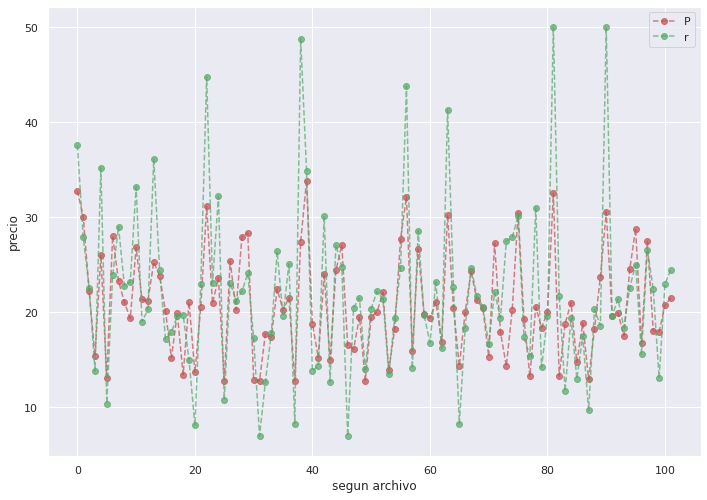

Text(0, 0.5, 'MEDV')

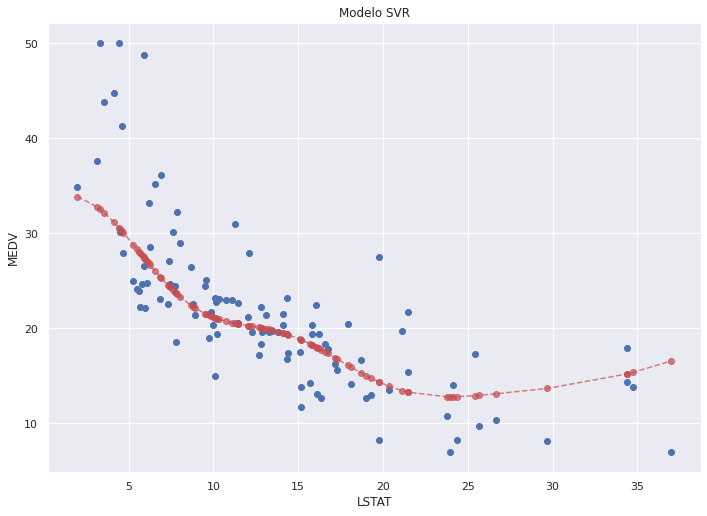

In [155]:
# Creacion de Modelo (KNeighborsRegressor) y ejecutar el entrenamiento
from sklearn.svm import SVR

modelo = SVR()
modelo.fit(X_entrenamiento,Y_entrenamiento)

# Evaluación del modelo (SVR)
prediccion_Y_entrenamiento = modelo.predict(X_entrenamiento)
rmse = (np.sqrt(mean_squared_error(Y_entrenamiento,prediccion_Y_entrenamiento)))
r2 = r2_score(Y_entrenamiento,prediccion_Y_entrenamiento)

print("-----------------------------------------")
print("Rendimiento del conjunto de entrenamiento")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

# Evaluación del modelo para conjunto de testeo (SVR)
prediccion_Y_testeo = modelo.predict(X_testeo)
rmse = (np.sqrt(mean_squared_error(Y_testeo,prediccion_Y_testeo)))
r2 = r2_score(Y_testeo,prediccion_Y_testeo)

print("-----------------------------------------")
print("Rendimiento del conjunto de testeo")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

#Graficar segun arreglo
eje_x = np.array(range(0,prediccion_Y_testeo.shape[0]))
plt.plot(eje_x, prediccion_Y_testeo, linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(eje_x, Y_testeo, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_testeo")
plt.xlabel('segun archivo')
plt.ylabel('precio')
plt.legend('Predicciones vs Y_testeo')
plt.show()

#Graficar Modelo
modelo_desordenado = pd.DataFrame(np.c_[X_testeo,modelo.predict(X_testeo)], columns=['LSTAT','MEDV_'])
modelo_ordenado = modelo_desordenado.sort_values(by='LSTAT', ascending=True)
x = X_testeo
y = Y_testeo
#plt.plot(x, modelo.predict(X_testeo), linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(modelo_ordenado['LSTAT'], modelo_ordenado['MEDV_'], linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.scatter(x,y,marker='o')
plt.title('Modelo SVR')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

-----------------------------------------
Rendimiento del conjunto de entrenamiento
RMSE es 5.326233770174346
R2 score es 0.66975313668729
-----------------------------------------
Rendimiento del conjunto de testeo
RMSE es 5.43580684338299
R2 score es 0.6226014050966198


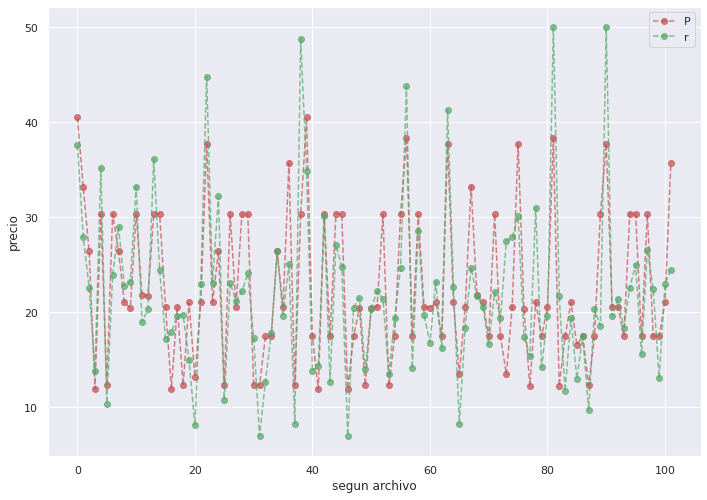

Text(0, 0.5, 'MEDV')

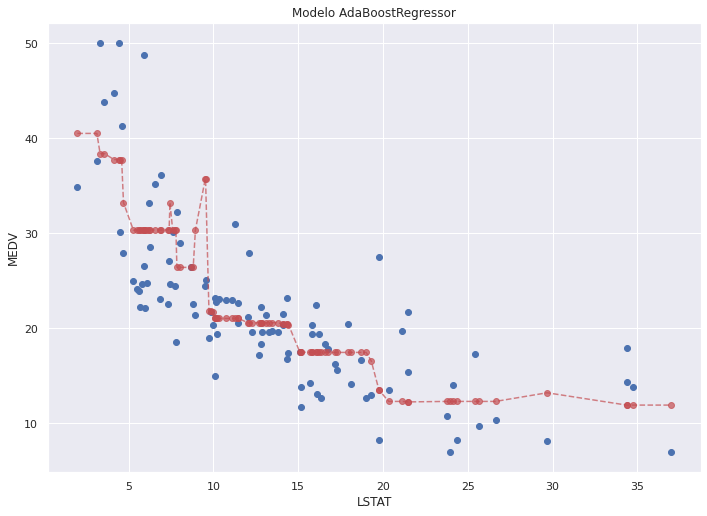

In [156]:
# Creacion de Modelo (AdaBoostRegressor) y ejecutar el entrenamiento
from sklearn.ensemble import AdaBoostRegressor

modelo = AdaBoostRegressor()
modelo.fit(X_entrenamiento,Y_entrenamiento)

# Evaluación del modelo (AdaBoostRegressor)
prediccion_Y_entrenamiento = modelo.predict(X_entrenamiento)
rmse = (np.sqrt(mean_squared_error(Y_entrenamiento,prediccion_Y_entrenamiento)))
r2 = r2_score(Y_entrenamiento,prediccion_Y_entrenamiento)

print("-----------------------------------------")
print("Rendimiento del conjunto de entrenamiento")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

# Evaluación del modelo para conjunto de testeo (AdaBoostRegressor)
prediccion_Y_testeo = modelo.predict(X_testeo)
rmse = (np.sqrt(mean_squared_error(Y_testeo,prediccion_Y_testeo)))
r2 = r2_score(Y_testeo,prediccion_Y_testeo)

print("-----------------------------------------")
print("Rendimiento del conjunto de testeo")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

#Graficar segun arreglo
eje_x = np.array(range(0,prediccion_Y_testeo.shape[0]))
plt.plot(eje_x, prediccion_Y_testeo, linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(eje_x, Y_testeo, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_testeo")
plt.xlabel('segun archivo')
plt.ylabel('precio')
plt.legend('Predicciones vs Y_testeo')
plt.show()

#Graficar Modelo
modelo_desordenado = pd.DataFrame(np.c_[X_testeo,modelo.predict(X_testeo)], columns=['LSTAT','MEDV_'])
modelo_ordenado = modelo_desordenado.sort_values(by='LSTAT', ascending=True)
x = X_testeo
y = Y_testeo
#plt.plot(x, modelo.predict(X_testeo), linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(modelo_ordenado['LSTAT'], modelo_ordenado['MEDV_'], linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.scatter(x,y,marker='o')
plt.title('Modelo AdaBoostRegressor')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

-----------------------------------------
Rendimiento del conjunto de entrenamiento
RMSE es 3.6630059359431804
R2 score es 0.8438027085974509
-----------------------------------------
Rendimiento del conjunto de testeo
RMSE es 6.235414162481928
R2 score es 0.503404411851183


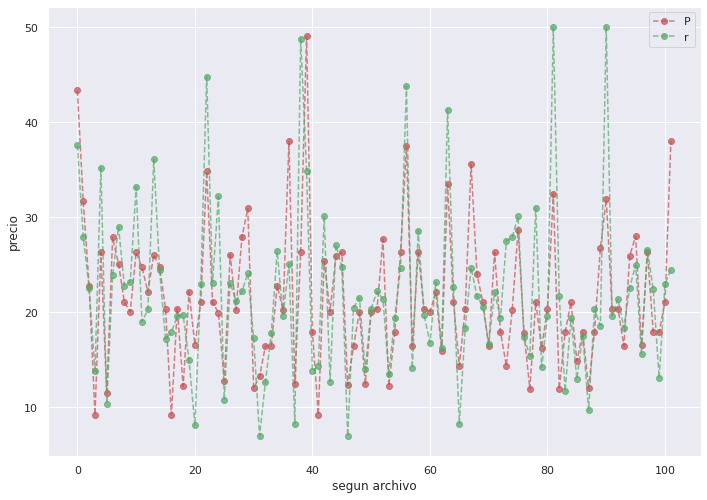

Text(0, 0.5, 'MEDV')

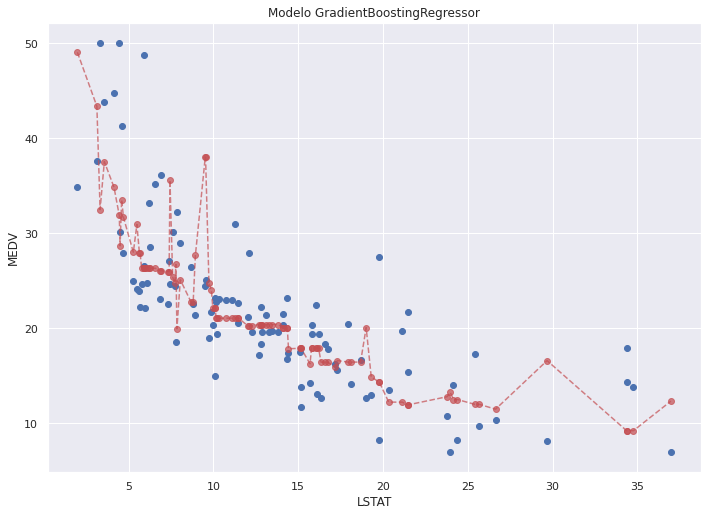

In [157]:
# Creacion de Modelo (GradientBoostingRegressor) y ejecutar el entrenamiento
from sklearn.ensemble import GradientBoostingRegressor

modelo = GradientBoostingRegressor()
modelo.fit(X_entrenamiento,Y_entrenamiento)

# Evaluación del modelo (GradientBoostingRegressor)
prediccion_Y_entrenamiento = modelo.predict(X_entrenamiento)
rmse = (np.sqrt(mean_squared_error(Y_entrenamiento,prediccion_Y_entrenamiento)))
r2 = r2_score(Y_entrenamiento,prediccion_Y_entrenamiento)

print("-----------------------------------------")
print("Rendimiento del conjunto de entrenamiento")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

# Evaluación del modelo para conjunto de testeo (GradientBoostingRegressor)
prediccion_Y_testeo = modelo.predict(X_testeo)
rmse = (np.sqrt(mean_squared_error(Y_testeo,prediccion_Y_testeo)))
r2 = r2_score(Y_testeo,prediccion_Y_testeo)

print("-----------------------------------------")
print("Rendimiento del conjunto de testeo")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

#Graficar segun arreglo
eje_x = np.array(range(0,prediccion_Y_testeo.shape[0]))
plt.plot(eje_x, prediccion_Y_testeo, linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(eje_x, Y_testeo, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_testeo")
plt.xlabel('segun archivo')
plt.ylabel('precio')
plt.legend('Predicciones vs Y_testeo')
plt.show()

#Graficar Modelo
modelo_desordenado = pd.DataFrame(np.c_[X_testeo,modelo.predict(X_testeo)], columns=['LSTAT','MEDV_'])
modelo_ordenado = modelo_desordenado.sort_values(by='LSTAT', ascending=True)
x = X_testeo
y = Y_testeo
#plt.plot(x, modelo.predict(X_testeo), linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(modelo_ordenado['LSTAT'], modelo_ordenado['MEDV_'], linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.scatter(x,y,marker='o')
plt.title('Modelo GradientBoostingRegressor')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

-----------------------------------------
Rendimiento del conjunto de entrenamiento
RMSE es 2.5832054661194053
R2 score es 0.9223187588926288
-----------------------------------------
Rendimiento del conjunto de testeo
RMSE es 6.929912985878969
R2 score es 0.38662254418411235


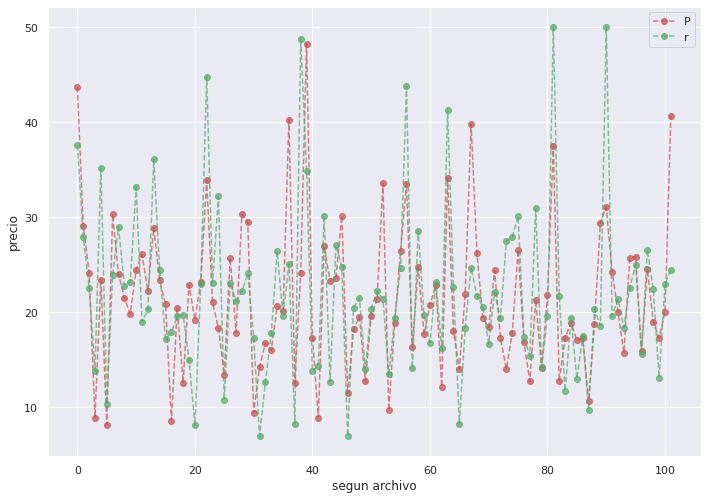

Text(0, 0.5, 'MEDV')

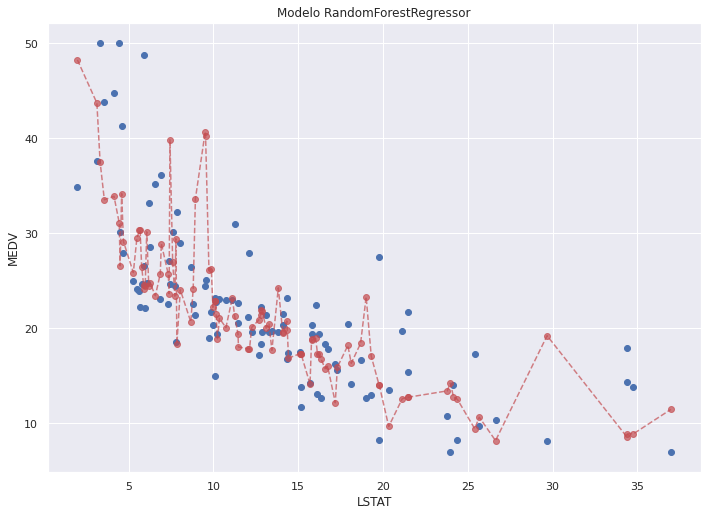

In [158]:
# Creacion de Modelo (RandomForestRegressor) y ejecutar el entrenamiento
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor()
modelo.fit(X_entrenamiento,Y_entrenamiento)

# Evaluación del modelo (RandomForestRegressor)
prediccion_Y_entrenamiento = modelo.predict(X_entrenamiento)
rmse = (np.sqrt(mean_squared_error(Y_entrenamiento,prediccion_Y_entrenamiento)))
r2 = r2_score(Y_entrenamiento,prediccion_Y_entrenamiento)

print("-----------------------------------------")
print("Rendimiento del conjunto de entrenamiento")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

# Evaluación del modelo para conjunto de testeo (RandomForestRegressor)
prediccion_Y_testeo = modelo.predict(X_testeo)
rmse = (np.sqrt(mean_squared_error(Y_testeo,prediccion_Y_testeo)))
r2 = r2_score(Y_testeo,prediccion_Y_testeo)

print("-----------------------------------------")
print("Rendimiento del conjunto de testeo")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

#Graficar segun arreglo
eje_x = np.array(range(0,prediccion_Y_testeo.shape[0]))
plt.plot(eje_x, prediccion_Y_testeo, linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(eje_x, Y_testeo, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_testeo")
plt.xlabel('segun archivo')
plt.ylabel('precio')
plt.legend('Predicciones vs Y_testeo')
plt.show()

#Graficar Modelo
modelo_desordenado = pd.DataFrame(np.c_[X_testeo,modelo.predict(X_testeo)], columns=['LSTAT','MEDV_'])
modelo_ordenado = modelo_desordenado.sort_values(by='LSTAT', ascending=True)
x = X_testeo
y = Y_testeo
#plt.plot(x, modelo.predict(X_testeo), linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(modelo_ordenado['LSTAT'], modelo_ordenado['MEDV_'], linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.scatter(x,y,marker='o')
plt.title('Modelo RandomForestRegressor')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

-----------------------------------------
Rendimiento del conjunto de entrenamiento
RMSE es 1.4980914860782253
R2 score es 0.9738738795129759
-----------------------------------------
Rendimiento del conjunto de testeo
RMSE es 7.38753541662324
R2 score es 0.3029380150066039


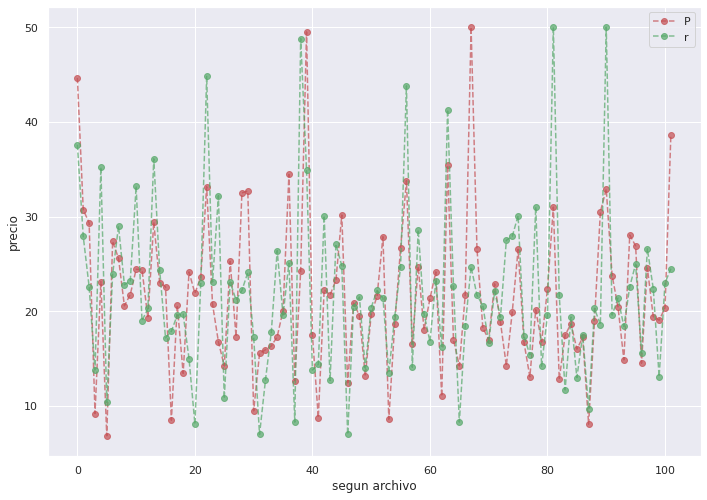

Text(0, 0.5, 'MEDV')

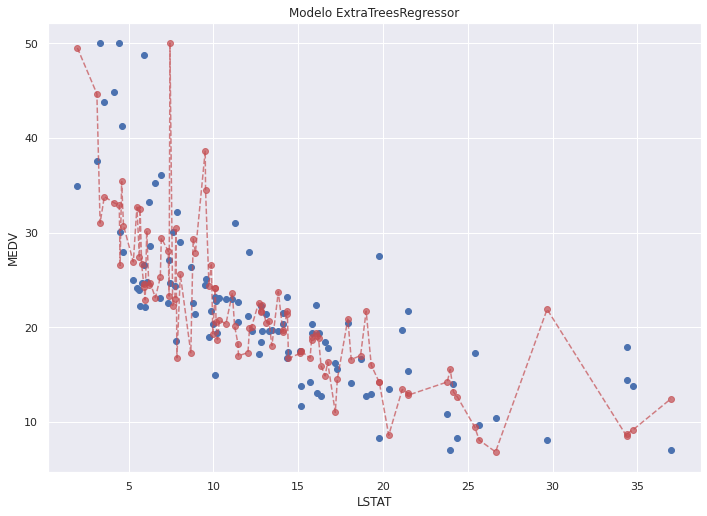

In [169]:
# Creacion de Modelo (ExtraTreesRegressor) y ejecutar el entrenamiento
from sklearn.ensemble import ExtraTreesRegressor

modelo = ExtraTreesRegressor()
modelo.fit(X_entrenamiento,Y_entrenamiento)

# Evaluación del modelo (ExtraTreesRegressor)
prediccion_Y_entrenamiento = modelo.predict(X_entrenamiento)
rmse = (np.sqrt(mean_squared_error(Y_entrenamiento,prediccion_Y_entrenamiento)))
r2 = r2_score(Y_entrenamiento,prediccion_Y_entrenamiento)

print("-----------------------------------------")
print("Rendimiento del conjunto de entrenamiento")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

# Evaluación del modelo para conjunto de testeo (ExtraTreesRegressor)
prediccion_Y_testeo = modelo.predict(X_testeo)
rmse = (np.sqrt(mean_squared_error(Y_testeo,prediccion_Y_testeo)))
r2 = r2_score(Y_testeo,prediccion_Y_testeo)

print("-----------------------------------------")
print("Rendimiento del conjunto de testeo")
print("RMSE es {}".format(rmse))
print("R2 score es {}".format(r2))

#Graficar segun arreglo
eje_x = np.array(range(0,prediccion_Y_testeo.shape[0]))
plt.plot(eje_x, prediccion_Y_testeo, linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(eje_x, Y_testeo, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_testeo")
plt.xlabel('segun archivo')
plt.ylabel('precio')
plt.legend('Predicciones vs Y_testeo')
plt.show()


#Graficar Modelo
modelo_desordenado = pd.DataFrame(np.c_[X_testeo,modelo.predict(X_testeo)], columns=['LSTAT','MEDV_'])
modelo_ordenado = modelo_desordenado.sort_values(by='LSTAT', ascending=True)
x = X_testeo
y = Y_testeo
#plt.plot(x, modelo.predict(X_testeo), linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.plot(modelo_ordenado['LSTAT'], modelo_ordenado['MEDV_'], linestyle = "--", marker="o", alpha=0.7, color='r', label = "Predicciones")
plt.scatter(x,y,marker='o')
plt.title('Modelo ExtraTreesRegressor')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [165]:
#Cuál es el mejor modelo?
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

modelos = {}
modelos["Linear"]         = LinearRegression()
modelos["Lasso"]          = Lasso()
modelos["ElasticNet"]     = ElasticNet()
modelos["kNN"]            = KNeighborsRegressor()
modelos["DecisionTree"]   = DecisionTreeRegressor()
modelos["SVR"]            = SVR()
modelos["AdaBoost"]       = AdaBoostRegressor()
modelos["GradientBoost"]  = GradientBoostingRegressor()
modelos["RandomForest"]   = RandomForestRegressor()
modelos["ExtraTree"]      = ExtraTreesRegressor()

resultados_modelos = []
print("Modelo\t\t  Mean\t\t std")
print("--------------------------------------")
for modelo_a_probar in modelos:
  resultados = cross_val_score(modelos[modelo_a_probar], X_entrenamiento, Y_entrenamiento, scoring = 'neg_mean_squared_error')
  resultados_modelos.append(resultados)
  if len(modelo_a_probar) < 8:
    print("{}\t\t: {}\t {}".format(modelo_a_probar, round(resultados.mean(),3), round(resultados.std(),3)))
  else:
    print("{}\t: {}\t {}".format(modelo_a_probar, round(resultados.mean(),3), round(resultados.std(),3)))

Modelo		  Mean		 std
--------------------------------------
Linear		: -39.364	 7.22
Lasso		: -39.353	 7.171
ElasticNet	: -39.347	 7.166
kNN		: -32.321	 5.887
DecisionTree	: -52.889	 7.305
SVR		: -35.785	 8.585
AdaBoost	: -32.786	 4.589
GradientBoost	: -34.185	 6.459
RandomForest	: -38.893	 6.417
ExtraTree	: -43.511	 3.447


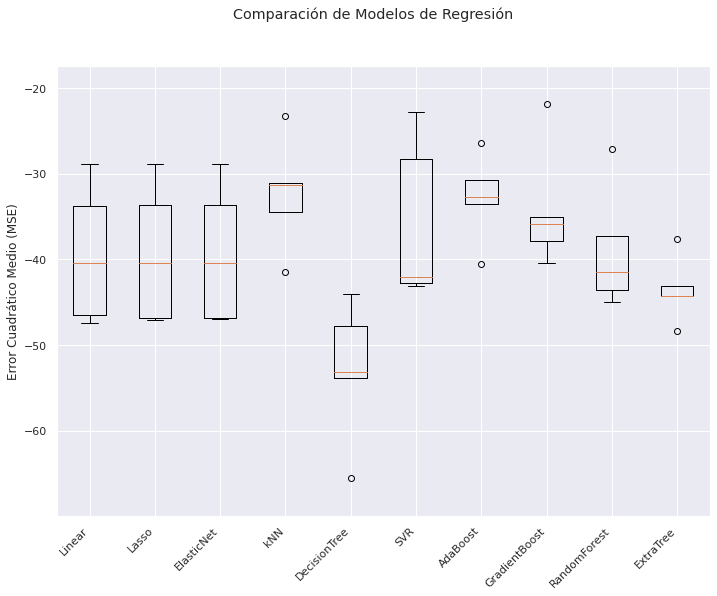

In [167]:
#visualizando los resultados
figura = plt.figure()
figura.suptitle('Comparación de Modelos de Regresión')
ejes = figura.add_subplot(111)
plt.boxplot(resultados_modelos)
ejes.set_xticklabels(modelos, rotation = 45, ha = "right")
ejes.set_ylabel("Error Cuadrático Medio (MSE)")
plt.margins(0.05,0.1)
plt.show()